In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import pickle

from rubin_scheduler.scheduler.model_observatory import ModelObservatory
from rubin_scheduler.scheduler.utils import TargetoO, get_current_footprint
from rubin_scheduler.scheduler.example.too_surveys import gen_too_surveys
from rubin_scheduler.scheduler.detailers import GrabSettingDetailer

In [2]:

with open('test_too.p', 'rb') as f:
    loaded_data = pickle.load(f)
    

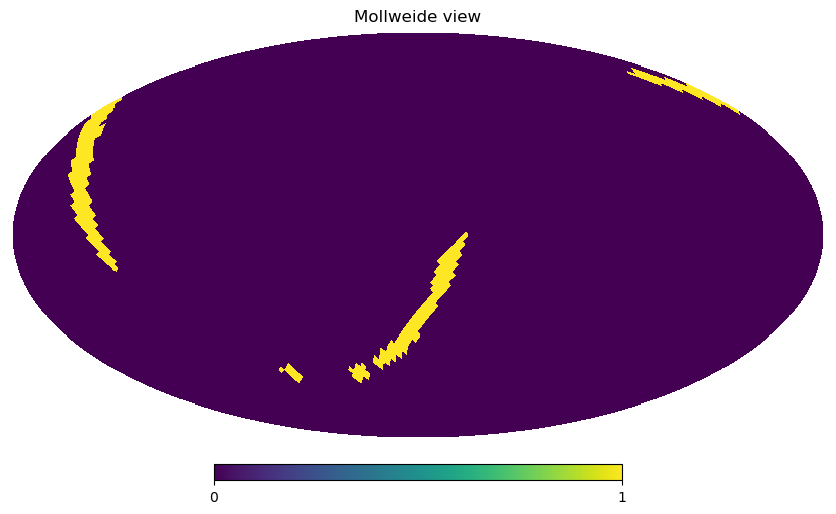

In [3]:
hp.mollview(loaded_data[0].footprint)

In [4]:
loaded_data[0]

In [5]:
# let's set up a model observatory and get conditions
mo = ModelObservatory()
mo.mjd += .2
conditions = mo.return_conditions()

In [6]:
too = TargetoO(100, loaded_data[0].footprint, conditions.mjd, 100, 0, 0, "GW_case_A", None)


In [7]:
conditions.targets_of_opportunity = [too]

In [8]:
surveys = gen_too_surveys(too_footprint=get_current_footprint(nside=32)[0]["r"])[0]

In [9]:
surveys

<ToOScriptedSurvey survey_name='ToO, GW_case_A' at 0x15d9a3770>

In [10]:
surveys.update_conditions(conditions)

In [11]:
obs = surveys.generate_observations(conditions)

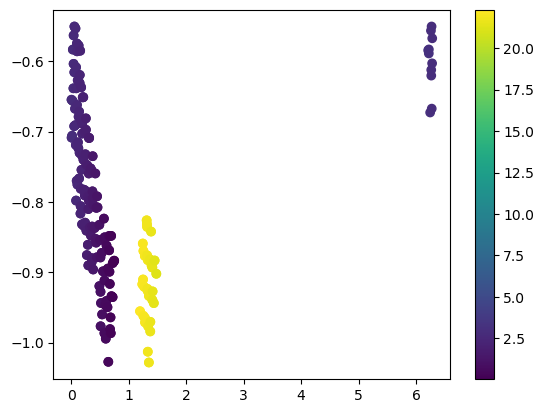

In [12]:
ha = (np.max(conditions.lmst) - obs["RA"]* 12.0 / np.pi) % 24

plt.scatter(obs["RA"], obs["dec"], c=ha)
plt.colorbar()

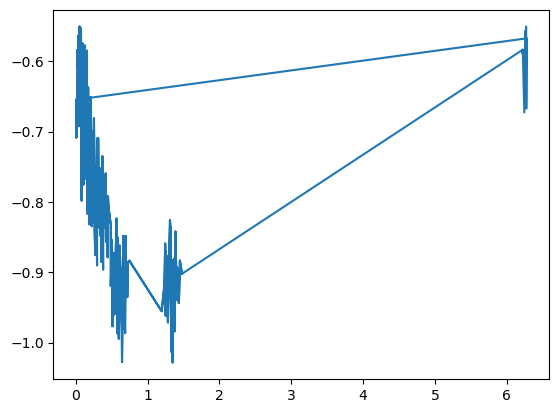

In [13]:
plt.plot(obs["RA"], obs["dec"])

In [14]:
ha

ObservationArray([ 2.87462254,  2.86777164,  2.83605837,  2.79652211,
                   2.78701997,  2.74844909,  2.73523715,  2.73346553,
                   2.69620462,  2.68806739,  2.68332868,  2.64047306,
                   2.61506567,  2.61155901,  2.58854612,  2.57064722,
                   2.5696301 ,  2.55779036,  2.5299212 ,  2.51724331,
                   2.51148693,  2.50909389,  2.48107767,  2.46186222,
                   2.4459853 ,  2.42091606,  2.40246983,  2.40083616,
                   2.36880718,  2.3682794 ,  2.33670603,  2.33599177,
                   2.32444946,  2.29765993,  2.27908293,  2.26618038,
                   2.26421789,  2.26187297,  2.23225164,  2.21331952,
                   2.17863766,  2.17496761,  2.16746575,  2.16087361,
                   2.12846781,  2.0919331 ,  2.0812297 ,  2.0808576 ,
                   2.03601773,  1.99944554,  1.99171601,  1.98914656,
                   1.97294573,  1.95324471,  1.92062533,  1.91608325,
                   1

In [15]:
np.unique(obs["RA"]).size, obs.size

(167, 323)

In [16]:
det = GrabSettingDetailer()

In [17]:
ack = det(obs, conditions)

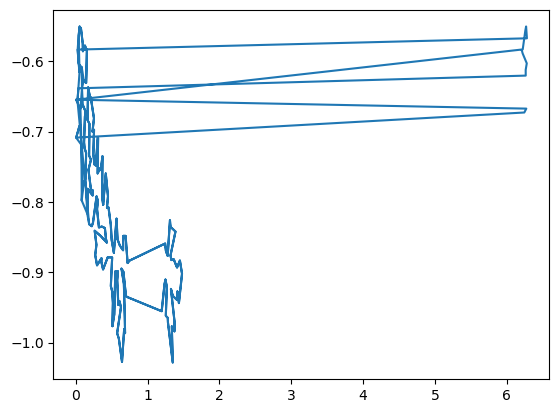

In [18]:
plt.plot(ack["RA"], ack["dec"])


In [19]:
ack["band"]


ObservationArray(['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i'

In [20]:
new_ha = (np.max(conditions.lmst) - ack["RA"]* 12.0 / np.pi) % 24

In [21]:
new_ha

ObservationArray([ 3.17427385,  3.12952312,  2.91062808,  2.96872279,
                   2.96634322,  2.74844909,  2.79652211,  2.87462254,
                   2.93514168,  3.04130123,  2.86777164,  2.83605837,
                   2.69620462,  2.61506567,  2.58854612,  2.5696301 ,
                   2.5299212 ,  2.48107767,  2.3682794 ,  2.33670603,
                   2.42091606,  2.4459853 ,  2.40246983,  2.36880718,
                   2.51148693,  2.64047306,  2.55779036,  2.57064722,
                   2.46186222,  2.33599177,  2.32444946,  2.29765993,
                   2.40083616,  2.50909389,  2.51724331,  2.61155901,
                   2.68332868,  2.73346553,  2.68806739,  2.73523715,
                   2.78701997,  2.90235334,  2.94608829,  2.98813367,
                   3.12591607,  2.87462254,  2.64047306,  2.61506567,
                   2.69620462,  2.83605837,  2.86777164,  2.58854612,
                   2.5299212 ,  2.48107767,  2.5696301 ,  2.27908293,
                   2

In [22]:
ack["band"]



ObservationArray(['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
                  'g', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i',
                  'i', 'i', 'i', 'i', 'i', 'i', 'i'